# CO2 Level Prediction Project - Enhanced Data Exploration

## Introduction

This notebook is the first step in our journey to predict CO2 levels using historical data. We aim to understand the patterns, trends, and anomalies present in the CO2 measurements to inform our future modeling efforts.

## Setup
```python


In [2]:
## Setup

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuration for notebooks
%matplotlib inline
sns.set(style="whitegrid")

/tmp/ipykernel_41711/1674113949.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
# Load the dataset
file_path = '/home/gengar/data/aiml/keys/data/raw/co2_data.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
data.head()

# Dataset dimensions
data.shape

# Data types and missing values
data.info()

# Summary statistics to understand the range and distribution of the data
data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3914 entries, 0 to 3913
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   site_code                3914 non-null   object 
 1   year                     3914 non-null   int64  
 2   month                    3914 non-null   int64  
 3   day                      3914 non-null   int64  
 4   hour                     3914 non-null   int64  
 5   minute                   3914 non-null   int64  
 6   second                   3914 non-null   int64  
 7   datetime                 3914 non-null   object 
 8   time_decimal             3914 non-null   float64
 9   air_sample_container_id  3914 non-null   object 
 10  value                    3914 non-null   float64
 11  value_unc                3914 non-null   float64
 12  latitude                 3914 non-null   float64
 13  longitude                3914 non-null   float64
 14  altitude                

,year,month,day,hour,minute,second,time_decimal,value,value_unc,latitude,longitude,altitude,elevation,intake_height,event_number
count,3914.000000,3914.000000,3914.000000,3914.000000,3914.000000,3914.000000,3914.000000,3914.000000,3914.000000,3914.000000,3914.000000,3914.000000,3914.0,3914.000000,3914.000000
mean,1999.264946,6.603986,15.582524,16.251150,22.148186,0.257537,1999.771797,368.581184,-18.001229,25.667943,-80.187123,5.234287,1.0,4.234287,183234.839550
std,13.823115,3.419408,8.759178,2.411326,17.195008,3.789382,13.812090,91.603723,133.493513,0.002954,0.019368,1.117223,0.0,1.117223,158962.534348
min,1972.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1972.949890,-999.990000,-999.999000,25.660000,-80.200000,3.000000,1.0,2.000000,61196.000000
25%,1986.000000,4.000000,8.000000,14.000000,5.000000,0.000000,1986.889843,350.542500,0.070000,25.665400,-80.200000,4.000000,1.0,3.000000,62174.250000
50%,1999.000000,7.000000,15.000000,16.000000,22.000000,0.000000,1999.948388,371.495000,0.073000,25.670000,-80.200000,6.000000,1.0,5.000000,63152.500000
75%,2012.000000,10.000000,23.000000,18.000000,30.000000,0.000000,2012.283470,396.255000,0.180000,25.670000,-80.158000,6.000000,1.0,5.000000,334833.750000
max,2022.000000,12.000000,31.000000,22.000000,59.000000,56.000000,2022.996404,510.750000,0.531000,25.670000,-80.158000,6.000000,1.0,5.000000,513664.000000


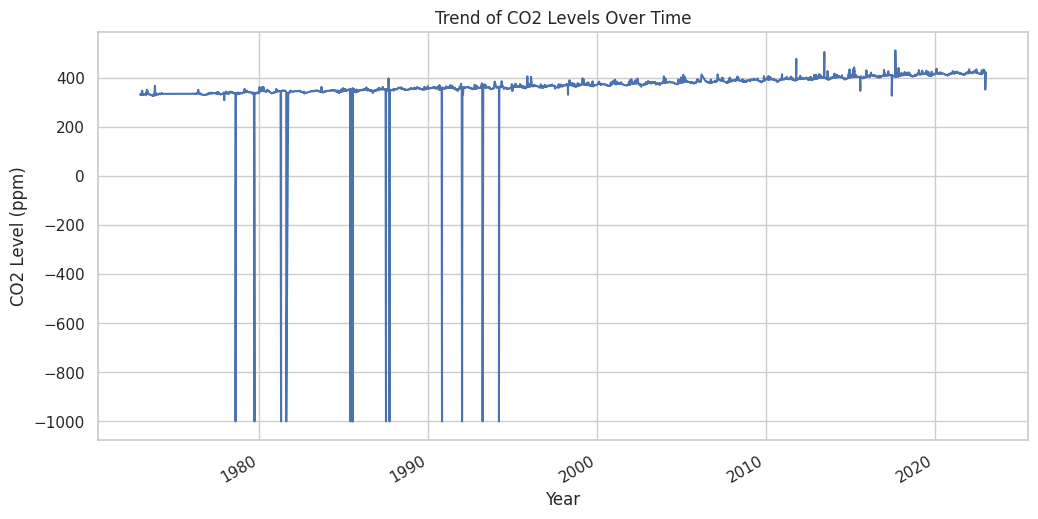

In [4]:
# Convert 'datetime' column to datetime type and set it as index
data['datetime'] = pd.to_datetime(data['datetime'])
data.set_index('datetime', inplace=True)

# Creating the plot
plt.figure(figsize=(12, 6))
data['value'].plot()
plt.title('Trend of CO2 Levels Over Time')
plt.xlabel('Year')
plt.ylabel('CO2 Level (ppm)')
plt.show()


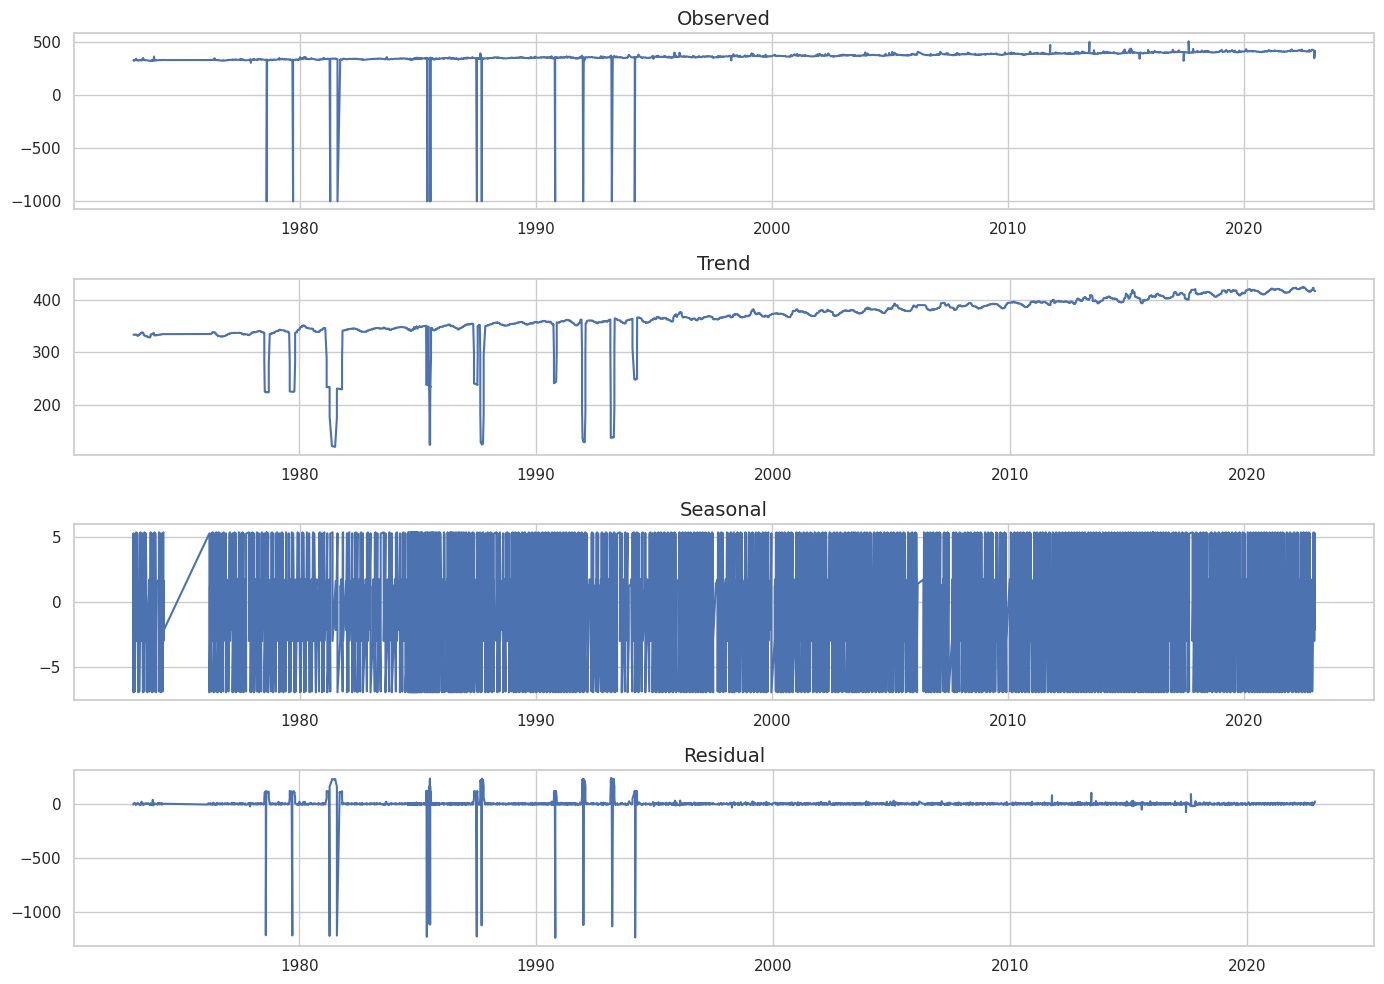

In [9]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Assuming 'data' is your DataFrame and 'value' is the column with CO2 levels
# Perform seasonal decomposition again
result = seasonal_decompose(data['value'], model='additive', period=12)

# Define a large figure to plot on
plt.figure(figsize=(14, 10))

# Plot the observed data
plt.subplot(411)
plt.plot(result.observed)
plt.title('Observed', fontsize=14)

# Plot the Trend data
plt.subplot(412)
plt.plot(result.trend)
plt.title('Trend', fontsize=14)

# Plot the Seasonal data
plt.subplot(413)
plt.plot(result.seasonal)
plt.title('Seasonal', fontsize=14)

# Plot the Residuals
plt.subplot(414)
plt.plot(result.resid)
plt.title('Residual', fontsize=14)

# Automatically adjust subplot params for better layout
plt.tight_layout()
plt.show()


# Seasonal Decomposition of CO2 Levels

The seasonal decomposition of time series data allows us to decompose the observed data into three components: trend, seasonality, and residuals. The CO2 levels from our dataset have been decomposed accordingly, and below is a description of what each component represents:

## Observed
The 'Observed' plot shows the actual CO2 levels recorded at each point in time. This is the raw data as it was collected, without any modifications or transformations.



## Trend
The 'Trend' component represents the long-term progression of the data, smoothing out the finer fluctuations to show the underlying direction in which the CO2 levels are moving. This can help us identify whether CO2 levels are generally increasing, decreasing, or remaining stable over time.



## Seasonal
The 'Seasonal' component captures the seasonal variation or patterns that repeat at regular intervals over time, such as annual cycles. In the context of CO2 levels, this might reflect natural processes that fluctuate throughout the year.



## Residual
The 'Residual' component contains the remainder of the information not captured by the trend or seasonal components. These can be thought of as random or irregular fluctuations that do not follow a predictable pattern. The residuals can sometimes point to unusual events or outliers in the data.



By examining each component, we gain a more nuanced understanding of the data. The trend shows us the overall direction, the seasonal reveals systematic repeating patterns, and the residual highlights anomalous events and noise in the data.


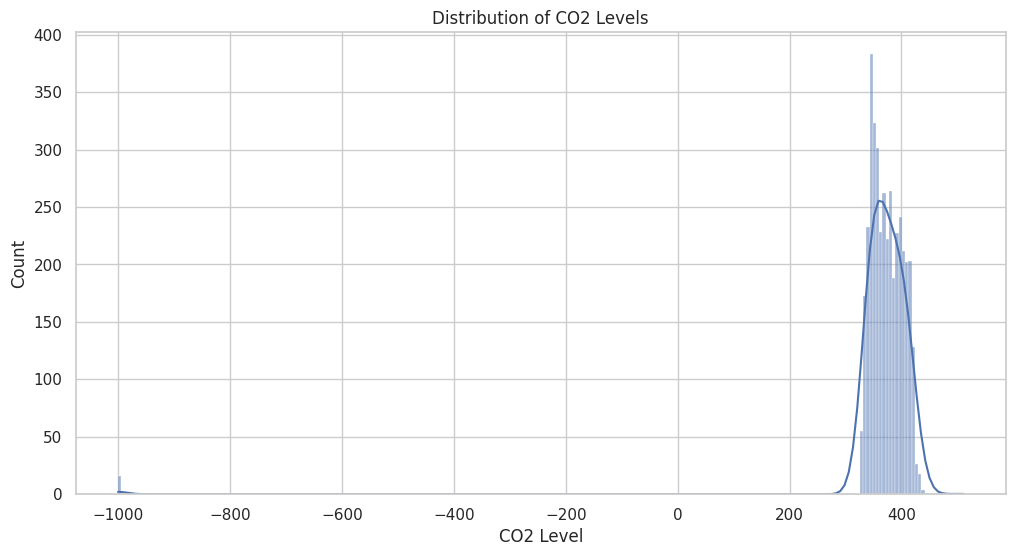

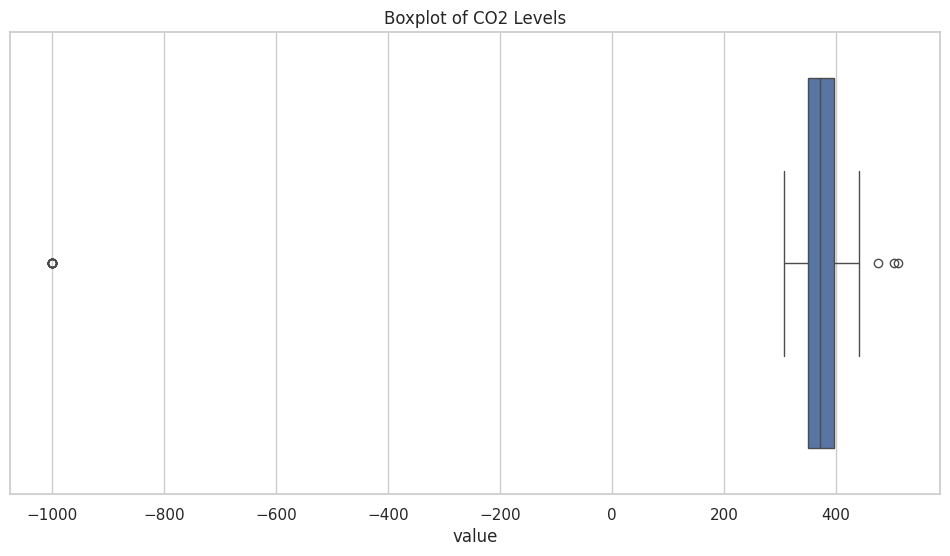

In [6]:
# Histogram and boxplot of CO2 levels
plt.figure(figsize=(12, 6))
sns.histplot(data['value'], kde=True)
plt.title('Distribution of CO2 Levels')
plt.xlabel('CO2 Level')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x=data['value'])
plt.title('Boxplot of CO2 Levels')
plt.show()


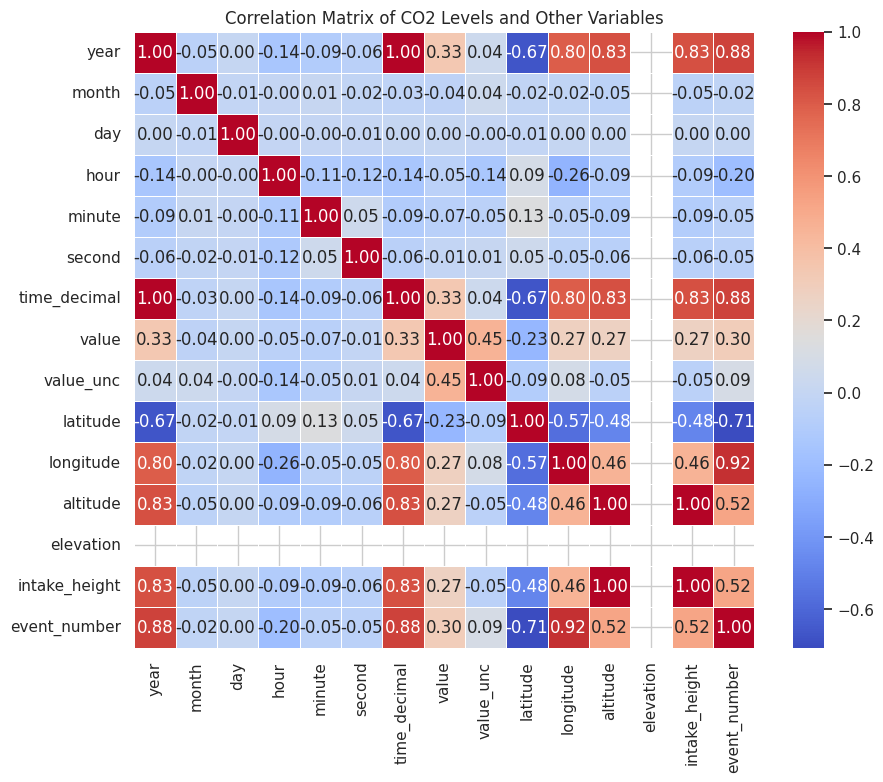

In [8]:
# Select only numeric columns for correlation matrix
numeric_data = data.select_dtypes(include=[np.number])

# Now you can safely compute the correlation matrix
corr_matrix = numeric_data.corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of CO2 Levels and Other Variables')
plt.show()

